In [1]:
import numpy as np
import numpy.linalg as la
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 15})
#%config InlineBackend.figure_format='retina'

In [2]:
def finite_diff_2nd(N):
    """Create a N-by-N matrix corresponding to the second-order central difference formula.
    
    The returned matrix must be divided by h^2.
    """
    
    assert N > 2, "at least three points are required"
    
    main_diag = -2 * np.eye(N)
    down_diag = np.diagflat(np.ones(N - 1), -1)
    return main_diag + down_diag + down_diag.T

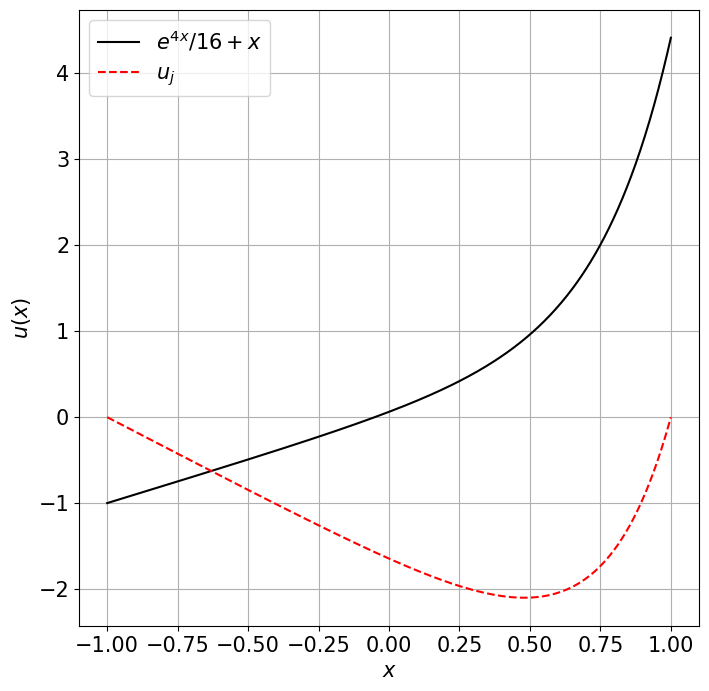

In [9]:
# boundary values
a, b = 0, 0

# uniformly discretized domain
N  = 1000
xj = np.linspace(-1, 1, N)
h  = xj[1] - xj[0]

# right-hand side
wj = np.exp(xj*4)
wj[0], wj[-1] = a, b # this is where the boundary values go to

# finite difference matrix w/ boundary conditions imposed
D2 = finite_diff_2nd(N) / h**2

# 1. decimate the first and last rows
D2[ 0, :] *= 0
D2[-1, :] *= 0

# 2. replace 1,1 and N,N components with 1
D2[ 0,  0] = 1
D2[-1, -1] = 1

# solve linear equations
phij = la.solve(D2, wj)

# draw
x_exact = np.linspace(xj[0], xj[-1], 500)
y_exact = [np.exp(4*x)/16 + x for x in x_exact]

plt.figure(figsize = (8, 8))
plt.plot(x_exact, y_exact,  "-k", label="$e^{4x}/16 + x$")
plt.plot(xj     , phij   , "--r", label="$u_j$")
plt.grid()
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$u(x)$")
plt.show()

n =   1, u(0) = -1.658013648836931
n =   2, u(0) = -1.658013648836931


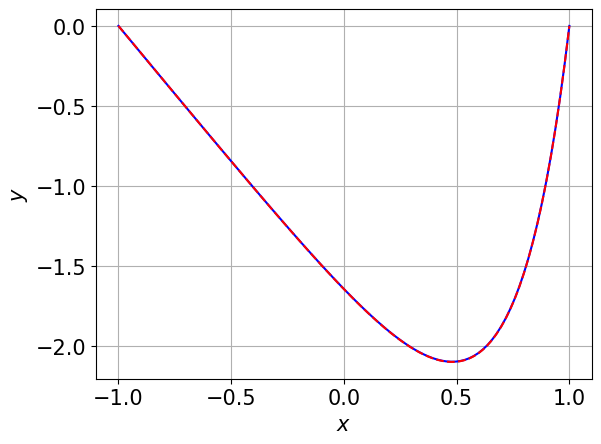

In [47]:
N  = 100
xj = np.linspace(-1, 1, N)
h  = xj[1] - xj[0]

D2 = finite_diff_2nd(N) / h**2
D2[ 0, :] *= 0
D2[-1, :] *= 0
D2[ 0,  0] = 1
D2[-1, -1] = 1

def predicate(u_new, u_old):
    delta = la.norm(u_new - u_old)
    return delta > 1e-7 * la.norm(u_new) # iterate until this is true

uj = np.zeros(N) # initial guess
n  = 0           # iteration count
while n < 1 or predicate(uj, u_prev):
    n       += 1
    u_prev   = uj
    
    rhs      = np.exp(xj*4)
    rhs[ 0] *= 0   # *important*: these are boundary values
    rhs[-1] *= 0   # *important*: these are boundary values
    uj       = la.solve(D2, rhs)
    
    print(f"n = {n:3d}, u(0) = {uj[N // 2]:.15f}")
    
    if n > 50: # prevent accidental infinite loop
        break
        
plt.figure()
plt.plot(xj, uj, "-b")
N  = 1000
xj = np.linspace(-1, 1, N)
plt.plot(xj     , phij   , "--r", label="$u_j$")
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

In [11]:
def heun_ode(f, y0, xs, n_corrections=1):
    """Approximate the solution of y' = f(y, x) by Heun's method.
    
    :param f:
        Right-hand side of the differential equation y' = f(y, x).
    :param y0:
        Initial value y0 = y(x0) where x0 is the first element of list xs.
    :param xs:
        A list of x values where we approximate y values.
    :param n_corrections:
        The number of corrector steps.
    """
    
    ys = [y0] * len(xs)
    for i, (x_curr, x_next) in enumerate(zip(xs[:-1], xs[1:])):
        y_curr = ys[i]
        h      = x_next - x_curr
        
        # predictor
        dydx   = f(x_curr, y_curr)
        y_next = y_curr + h*dydx
        
        # corrector
        for j in range(n_corrections):
            y_next = y_curr + 0.5*h * (dydx + f(x_next, y_next))

        ys[i + 1] = y_next

    return ys

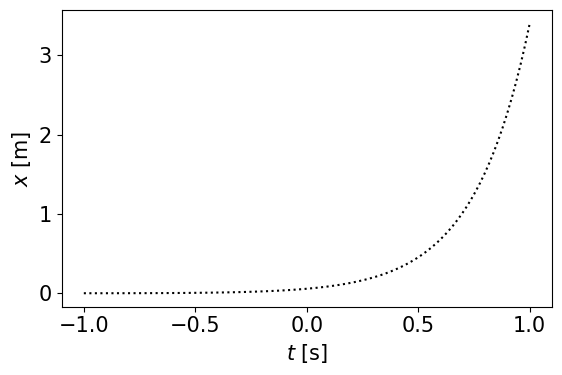

In [14]:
def F(t, Y): # F = [v, -g], Y = [x, v]
    F = [Y[1], np.exp(4*t)]
    return np.array(F)

t    = np.linspace(-1, 1, 100)
Y_0  = np.array([0, 0])
x, v = zip(*heun_ode(F, Y_0, t))

plt.figure(figsize=[11, 4])

plt.subplot(1, 2, 1)
plt.plot(t, x, ':k')
plt.xlabel("$t$ [s]")
plt.ylabel("$x$ [m]")


plt.tight_layout()
plt.show()